In [4]:
import pandas as pd
data = pd.read_csv("worldometer_data.csv")
data.head()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [5]:
columns_to_clean = ["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases", 
                    "Serious,Critical", "Tot Cases/1M pop", "Deaths/1M pop", 
                    "TotalTests", "Tests/1M pop", "Population"]

for col in columns_to_clean:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace(",", "").str.strip().replace("N/A", "")
        data[col] = pd.to_numeric(data[col], errors="coerce")


In [6]:
data = data.dropna(subset=["TotalCases", "Population"])
data.fillna(0, inplace=True)


In [7]:
data.rename(columns={"Country/Region": "Country"}, inplace=True)


In [8]:
print(data.shape)        # Rows and columns
print(data.info())       # Column types and null values
print(data.describe())   # Mean, min, max, etc. of numeric columns


(208, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           208 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        208 non-null    int64  
 4   NewCases          208 non-null    float64
 5   TotalDeaths       208 non-null    float64
 6   NewDeaths         208 non-null    float64
 7   TotalRecovered    208 non-null    float64
 8   NewRecovered      208 non-null    float64
 9   ActiveCases       208 non-null    float64
 10  Serious,Critical  208 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     208 non-null    float64
 13  TotalTests        208 non-null    float64
 14  Tests/1M pop      208 non-null    float64
 15  WHO Region        208 non-null    object 
dtypes: float64(12), int64(1), object(3)
mem

In [9]:
print(data["Continent"].value_counts())

Continent
Africa               57
Asia                 48
Europe               48
North America        35
South America        14
Australia/Oceania     6
Name: count, dtype: int64


In [10]:
print(data.corr(numeric_only=True))  # See relationships between numeric values


                  Population  TotalCases  NewCases  TotalDeaths  NewDeaths  \
Population          1.000000    0.546158  0.062038     0.435091   0.064131   
TotalCases          0.546158    1.000000  0.058221     0.938926   0.059182   
NewCases            0.062038    0.058221  1.000000     0.218270   0.995492   
TotalDeaths         0.435091    0.938926  0.218270     1.000000   0.221289   
NewDeaths           0.064131    0.059182  0.995492     0.221289   1.000000   
TotalRecovered      0.589427    0.982647  0.065644     0.903258   0.067428   
NewRecovered        0.061446    0.057809  0.999508     0.216887   0.992144   
ActiveCases         0.458633    0.966947  0.032122     0.897455   0.031525   
Serious,Critical    0.588463    0.967090  0.156273     0.909078   0.159487   
Tot Cases/1M pop   -0.009337    0.252627  0.015607     0.237885   0.010629   
Deaths/1M pop       0.041476    0.287967  0.138926     0.431003   0.132750   
TotalTests          0.497840    0.891409 -0.005779     0.851939 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


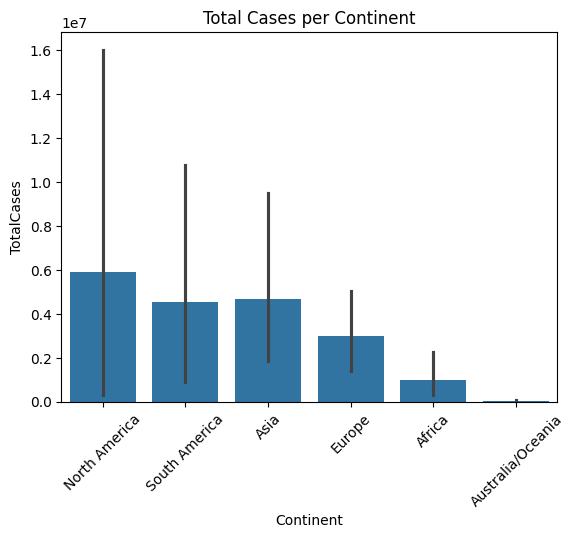

In [12]:
sns.barplot(x="Continent", y="TotalCases", data=data, estimator=sum)
plt.title("Total Cases per Continent")
plt.xticks(rotation=45)
plt.show()


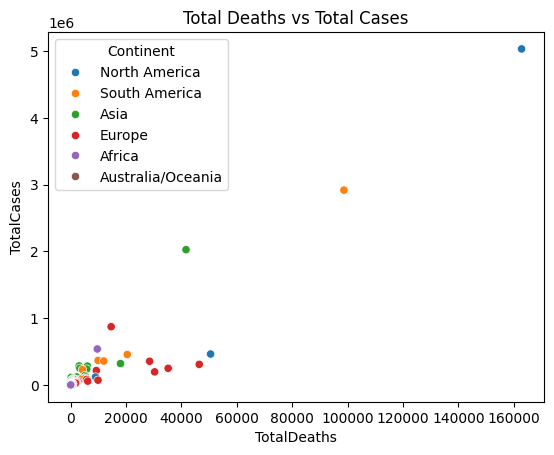

In [13]:
sns.scatterplot(x="TotalDeaths", y="TotalCases", hue="Continent", data=data)
plt.title("Total Deaths vs Total Cases")
plt.show()


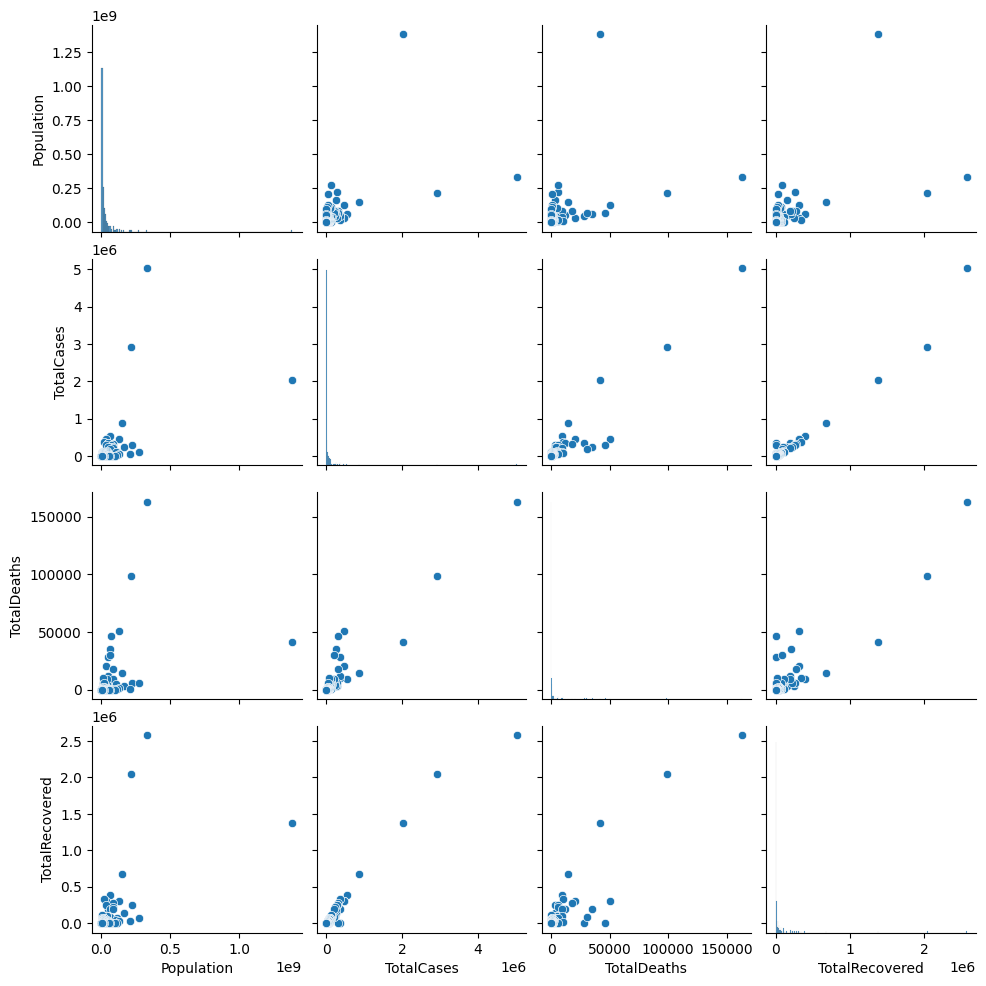

In [14]:
sns.pairplot(data[["Population", "TotalCases", "TotalDeaths", "TotalRecovered"]])


In [15]:
data["DeathRate"] = data["TotalDeaths"] / data["TotalCases"]
data["RecoveryRate"] = data["TotalRecovered"] / data["TotalCases"]
data["CasesPerMillion"] = data["TotalCases"] / data["Population"] * 1_000_000


In [16]:
# Top 5 countries with the most cases
top5 = data.sort_values("TotalCases", ascending=False).head(5)
print(top5[["Country", "TotalCases", "TotalDeaths", "TotalRecovered"]])


        Country  TotalCases  TotalDeaths  TotalRecovered
0           USA     5032179     162804.0       2576668.0
1        Brazil     2917562      98644.0       2047660.0
2         India     2025409      41638.0       1377384.0
3        Russia      871894      14606.0        676357.0
4  South Africa      538184       9604.0        387316.0


In [17]:
# Average recovery rate by continent
print(data.groupby("Continent")["RecoveryRate"].mean())


Continent
Africa               0.645311
Asia                 0.783369
Australia/Oceania    0.746994
Europe               0.696285
North America        0.668250
South America        0.676172
Name: RecoveryRate, dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[["TotalCases", "Population"]]
y = data["TotalDeaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: -0.1100573984747486
